This code contains code created by Haque, A., Reddi, V., & Giallanza, T. (2021). Deep learning for suicide and depression identification with unsupervised label correction. Artificial Neural Networks and Machine Learning–ICANN 2021: 30th International Conference on Artificial Neural Networks, Bratislava, Slovakia, September 14–17, 2021, Proceedings, Part V 30, 436–447.
Their paper is accessible at https://arxiv.org/pdf/2102.09427.pdf.
Their code is accessible at https://github.com/ayaanzhaque/SDCNL.

This code has been modified and adapted for this task. Random states have been added to ensure reproducibility. 

In [6]:

import umap.umap_ as umap
import pandas as pd

features = pd.read_csv('BLOOM_embedded.csv', delimiter=',') # load the features after creating them
#features = pd.read_csv('GPTNeo_embedded.csv', delimiter=',') # load the features after creating them


#UMAP
reducer = umap.UMAP(
        n_neighbors=45,
        min_dist=0.7,
        n_components=2,
        metric='manhattan',
        random_state= 7104 #for BLOOM
        #random_state= 0 #for GPT-Neo
    )

low_dim_features = reducer.fit_transform(features)




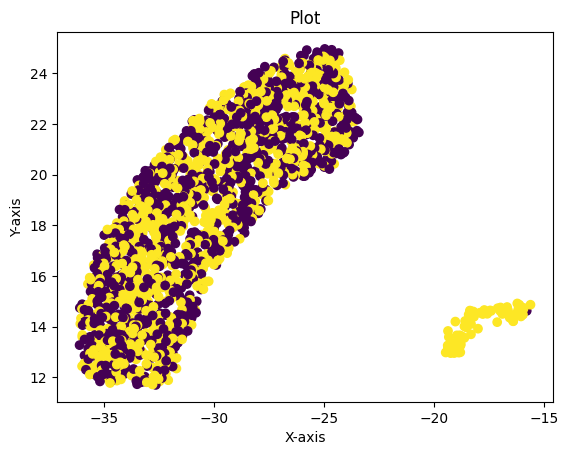

In [7]:
#Create plot features

a= low_dim_features 

import numpy as np
import matplotlib.pyplot as plt
original_train_labels = pd.read_csv("combined-set.csv")["is_suicide"]


x = a[:,0]
y = a[:,1]

plt.scatter(x, y, c= original_train_labels)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot')

# Show the plot
plt.show()


In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, covariance_type='full').fit(low_dim_features)
predictions = gmm.predict(low_dim_features)
probs = gmm.predict_proba(low_dim_features)

In [9]:
# Threshold-Based Label Correction

# This notebool contains the code to correct the ground-truth labels using clustering algorithm predictions. 
#This notebook requires loading the ground-truth labels as well as the predicted labels exported from the clustering algorithms.

import numpy as np
import pandas as pd

original_train_labels = pd.read_csv("training-set.csv")["is_suicide"]
original_test_labels = pd.read_csv("testing-set.csv")["is_suicide"]

original_train_labels = np.asarray(original_train_labels)
original_test_labels = np.asarray(original_test_labels)


predicted_labels = np.asarray(predictions)
predicted_probs = np.asarray(probs)

predicted_train_labels = predicted_labels[0:len(original_train_labels)]
predicted_train_probs = predicted_probs[:len(original_train_labels)]

predicted_test_labels = predicted_labels[len(original_train_labels):]
predicted_test_probs = predicted_probs[len(original_train_labels):]

tau = 0.90 # default is 0.90

final_train_labels = []
counter = 0
for i in range(len(original_train_labels)):
  if original_train_labels[i] != predicted_train_labels[i]:
    if (predicted_train_probs[i] > tau).any():
      counter += 1
      final_train_labels.append(predicted_train_labels[i])
    else:
      final_train_labels.append(original_train_labels[i])
  else:
    final_train_labels.append(original_train_labels[i])

final_train_labels = np.asarray(final_train_labels)

final_test_labels = []

for i in range(len(original_test_labels)):
  if original_test_labels[i] != predicted_test_labels[i]:
    if (predicted_test_probs[i] > tau).any():
      counter += 1
      final_test_labels.append(predicted_test_labels[i])
    else:
      final_test_labels.append(original_test_labels[i])
  else:
    final_test_labels.append(original_test_labels[i])

final_test_labels = np.asarray(final_test_labels)

print(final_train_labels.shape, final_test_labels.shape)
print(counter)

(1516,) (379,)
728


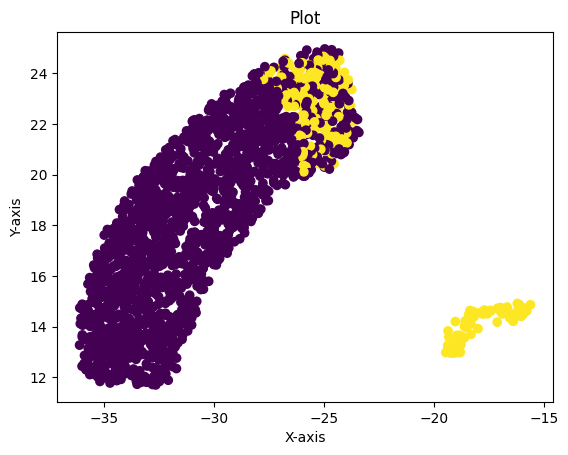

In [10]:

#Create plot features

a = np.concatenate([final_train_labels, final_test_labels])
b= low_dim_features 

import numpy as np
import matplotlib.pyplot as plt

x = b[:,0]
y = b[:,1]

plt.scatter(x, y, c= a)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot')

# Show the plot
plt.show()
